<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [1]:
'''import matplotlib.pyplot as plt

% matplotlib inline'''

'import matplotlib.pyplot as plt\n\n% matplotlib inline'

In [2]:
'''import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()
#print(type(boston))

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])'''

"import pandas as pd\nimport numpy as np\nimport seaborn as sns\nfrom sklearn.datasets import load_boston\n\nboston = load_boston()\n#print(type(boston))\n\nX = pd.DataFrame(boston.data,\n                 columns=boston.feature_names)\ny = pd.DataFrame(boston.target,\n                 columns=['MEDV'])\n\nprint(boston['DESCR'])"

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [3]:
'''# X and y were concatanated so that EDA can be done on both features and target.
boston_df = pd.concat([X, y], axis = 1)
print(boston_df.head())'''

'# X and y were concatanated so that EDA can be done on both features and target.\nboston_df = pd.concat([X, y], axis = 1)\nprint(boston_df.head())'

In [4]:
'''# Exploratory data analysis.
# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

#print(type(X))
# To tell us if there are any null values. There are none.
boston_df.isnull().sum()'''

'# Exploratory data analysis.\n# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column\n\n#print(type(X))\n# To tell us if there are any null values. There are none.\nboston_df.isnull().sum()'

In [5]:
'''# To check the data type of the features.
boston_df.dtypes'''

'# To check the data type of the features.\nboston_df.dtypes'

In [6]:
'''# To identify how big the data set is.
boston_df.shape'''

'# To identify how big the data set is.\nboston_df.shape'

In [7]:
'''# To have a quick overview of the basic statistics of each feature.
boston_df.describe()'''

'# To have a quick overview of the basic statistics of each feature.\nboston_df.describe()'

In [8]:
'''# To identify uf there are any missing values. There are none.
boston_df.info()'''

'# To identify uf there are any missing values. There are none.\nboston_df.info()'

In [9]:
'''#number of unique values for each column
boston_df.nunique()'''

'#number of unique values for each column\nboston_df.nunique()'

In [10]:
# The data is ready for use. (1) There are no null values. (2) Values are all standardized as floats.
# (3) There seems to be enough unique numbers in the features to start analysis. 

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [11]:
'''# Or can I just perform a scatter matrix to have a quick overview of the top 3 or 4 factors correlated to MEDV?

scatter_matix = pd.plotting.scatter_matrix(boston_df, alpha=0.2, figsize=(10, 10), diagonal='hist')'''

"# Or can I just perform a scatter matrix to have a quick overview of the top 3 or 4 factors correlated to MEDV?\n\nscatter_matix = pd.plotting.scatter_matrix(boston_df, alpha=0.2, figsize=(10, 10), diagonal='hist')"

In [12]:
# From scatter matrix, I can select features by:
# (1) Idenitfying larger correlation
# (2) Understand features to see which makes sense. (e.g. Would buyers know air composition in the area?)
# (3) Features with larger variance in values. (e.g. LSTAT vs RAD)
# (4) Plot out selected feature to confirm.

In [13]:
# As such, I select INDUS, RM, PTRATIO, LSTAT as features.

In [14]:
'''# INDUS: Could signify a blue collar town where workers might not be able to afford expensive housing?

sns.lmplot(x='INDUS', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});'''

"# INDUS: Could signify a blue collar town where workers might not be able to afford expensive housing?\n\nsns.lmplot(x='INDUS', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});"

In [15]:
'''# RM: Intuitive that more rooms would cost more?

sns.lmplot(x='RM', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});'''

"# RM: Intuitive that more rooms would cost more?\n\nsns.lmplot(x='RM', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});"

In [16]:
'''# PTRATIO: Perhaps of importance to young families, or could potentially signify better/private schools?

sns.lmplot(x='PTRATIO', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});'''

"# PTRATIO: Perhaps of importance to young families, or could potentially signify better/private schools?\n\nsns.lmplot(x='PTRATIO', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});"

In [17]:
'''# LSTAT: Lower status (poorer parts of Boston) could bring prices down due to safety concerns, etc.

sns.lmplot(x='LSTAT', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});'''

"# LSTAT: Lower status (poorer parts of Boston) could bring prices down due to safety concerns, etc.\n\nsns.lmplot(x='LSTAT', y='MEDV', data=boston_df, aspect=1.5, scatter_kws={'alpha':0.2});"

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [18]:
# Chosen features: INDUS, RM, PTRATIO, LSTAT

In [19]:
'''from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler'''

'from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn import metrics\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.preprocessing import StandardScaler'

In [20]:
'''feature_cols = ['INDUS', 'RM', 'PTRATIO', 'LSTAT']

X = boston_df[feature_cols]
#print(type(X))
#y = boston_df.MEDV
#print(type(y))
#X = pd.DataFrame(boston.data,
#                 columns=boston.feature_names)
#y = pd.DataFrame(boston.target,
#                 columns=['MEDV'])

y = y.astype('int')

# 70/30 split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = 0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#print (X_train.shape, y_train.shape)
#print (X_test.shape, y_test.shape)

y = y.astype('int')

#print (y_train.head())

knn = KNeighborsClassifier(n_neighbors = 8)
# Error starts here
knn.fit(X_train, y_train.values.reshape(-1,))
#knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))'''

"feature_cols = ['INDUS', 'RM', 'PTRATIO', 'LSTAT']\n\nX = boston_df[feature_cols]\n#print(type(X))\n#y = boston_df.MEDV\n#print(type(y))\n#X = pd.DataFrame(boston.data,\n#                 columns=boston.feature_names)\n#y = pd.DataFrame(boston.target,\n#                 columns=['MEDV'])\n\ny = y.astype('int')\n\n# 70/30 split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = 0.3)\n\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\n#print (X_train.shape, y_train.shape)\n#print (X_test.shape, y_test.shape)\n\ny = y.astype('int')\n\n#print (y_train.head())\n\nknn = KNeighborsClassifier(n_neighbors = 8)\n# Error starts here\nknn.fit(X_train, y_train.values.reshape(-1,))\n#knn.fit(X_train, y_train)\n\ny_pred_class = knn.predict(X_test)\nprint((metrics.accuracy_score(y_test, y_pred_class)))"

In [21]:
#scores = []
#for k in range(1,100):
#    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X,y)
#    pred = knn.predict(X)
#    score = float(sum(pred == y)) / len(y)
#    scores.append([k, score])
    
#data = pd.DataFrame(scores,columns=['k','score'])
#data.plot.line(x='k',y='score');

In [22]:
'''# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

y = y.astype('int')

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:
    
    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()'''

"# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.\n\nk_range = list(range(1, 101))\ntraining_error = []\ntesting_error = []\n\ny = y.astype('int')\n\n# Find test accuracy for all values of K between 1 and 100 (inclusive).\nfor k in k_range:\n    \n    # Instantiate the model with the current K value.\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train)\n    \n    # Calculate training error (error = 1 - accuracy).\n    y_pred_class = knn.predict(X)\n    training_accuracy = metrics.accuracy_score(y, y_pred_class)\n    training_error.append(1 - training_accuracy)\n    \n    # Calculate testing error.\n    y_pred_class = knn.predict(X_test)\n    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)\n    testing_error.append(1 - testing_accuracy)\n\n# Create a DataFrame of K, training error, and testing error.\ncolumn_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}\ndf = pd.DataFrame(column_dict).set_i

In [23]:
'''df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');'''

"df.plot(y='testing error');\nplt.xlabel('Value of K for KNN');\nplt.ylabel('Error (lower is better)');"

In [24]:
'''# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()'''

"# Find the minimum testing error and the associated K value.\ndf.sort_values('testing error').head()"

In [25]:
'''# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');'''

"# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.\ndf.plot();\nplt.xlabel('Value of K for KNN');\nplt.ylabel('Error (lower is better)');"

In [26]:
'''feature_cols = ['INDUS', 'RM', 'PTRATIO', 'LSTAT']
#feature_cols = ['RM', 'PTRATIO', 'LSTAT']
X = boston_df[feature_cols]
#print(type(X))
y = boston_df.MEDV
#print(type(y))
#X = pd.DataFrame(boston.data,
#                 columns=boston.feature_names)
#y = pd.DataFrame(boston.target,
#                 columns=['MEDV'])

y = y.astype('int')

# 70/30 split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = 0.1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

#y = y.astype('int')

#print (y_train.head())

knn = KNeighborsClassifier(n_neighbors = 1)
# Error starts here
# knn.fit(X_train, y_train.values.reshape(-1,))
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))'''

"feature_cols = ['INDUS', 'RM', 'PTRATIO', 'LSTAT']\n#feature_cols = ['RM', 'PTRATIO', 'LSTAT']\nX = boston_df[feature_cols]\n#print(type(X))\ny = boston_df.MEDV\n#print(type(y))\n#X = pd.DataFrame(boston.data,\n#                 columns=boston.feature_names)\n#y = pd.DataFrame(boston.target,\n#                 columns=['MEDV'])\n\ny = y.astype('int')\n\n# 70/30 split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = 0.1)\n\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\nprint (X_train.shape, y_train.shape)\nprint (X_test.shape, y_test.shape)\n\n#y = y.astype('int')\n\n#print (y_train.head())\n\nknn = KNeighborsClassifier(n_neighbors = 1)\n# Error starts here\n# knn.fit(X_train, y_train.values.reshape(-1,))\nknn.fit(X_train, y_train)\n\ny_pred_class = knn.predict(X_test)\nprint((metrics.accuracy_score(y_test, y_pred_class)))"

In [27]:
#scores = []
#for k in range(1,100):
#    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X,y)
#    pred = knn.predict(X)
#    score = float(sum(pred == y)) / len(y)
#    scores.append([k, score])
    
#data = pd.DataFrame(scores,columns=['k','score'])
#data.plot.line(x='k',y='score');

In [28]:
'''# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()'''

"# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.\n\nk_range = list(range(1, 101))\ntraining_error = []\ntesting_error = []\n\n# Find test accuracy for all values of K between 1 and 100 (inclusive).\nfor k in k_range:\n\n    # Instantiate the model with the current K value.\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train)\n    \n    # Calculate training error (error = 1 - accuracy).\n    y_pred_class = knn.predict(X)\n    training_accuracy = metrics.accuracy_score(y, y_pred_class)\n    training_error.append(1 - training_accuracy)\n    \n    # Calculate testing error.\n    y_pred_class = knn.predict(X_test)\n    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)\n    testing_error.append(1 - testing_accuracy)\n\n# Create a DataFrame of K, training error, and testing error.\ncolumn_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}\ndf = pd.DataFrame(column_dict).set_index('K').sort_index(ascend

In [29]:
'''# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()'''

"# Find the minimum testing error and the associated K value.\ndf.sort_values('testing error').head()"

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [30]:
'''from sklearn import model_selection'''

'from sklearn import model_selection'

In [31]:
'''kf = model_selection.KFold(n_splits=8, shuffle=True)'''

'kf = model_selection.KFold(n_splits=8, shuffle=True)'

In [32]:
'''mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))'''

'mse_values = []\nscores = []\nn = 0\n\nprint("~~~~ CROSS VALIDATION each fold ~~~~")\nfor train_index, test_index in kf.split(X, y):\n    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])\n    \n    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))\n    scores.append(lr.score(X, y))\n    \n    n += 1\n    \n    print(\'Model {}\'.format(n))\n    print(\'MSE: {}\'.format(mse_values[n-1]))\n    print(\'R2: {}\n\'.format(scores[n-1]))\n\n\nprint("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")\nprint(\'Mean of MSE for all folds: {}\'.format(np.mean(mse_values)))\nprint(\'Mean of R2 for all folds: {}\'.format(np.mean(scores)))'

# KNN Practice

In [33]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [34]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [35]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

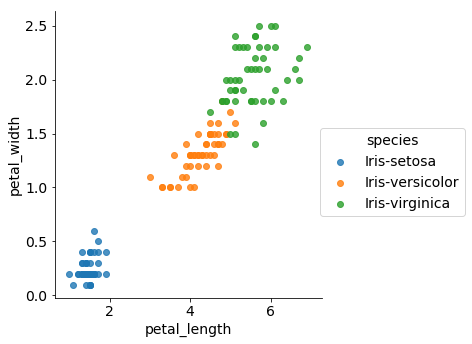

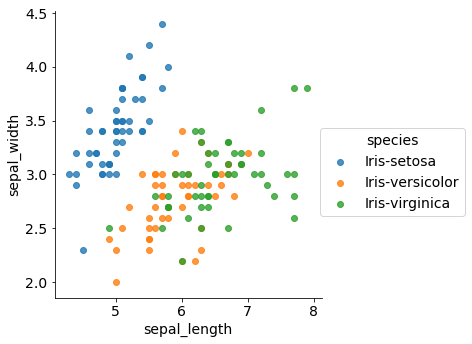

In [47]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

sns.lmplot(x='petal_length', y='petal_width', fit_reg=False, hue='species', data=iris)

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES

sns.lmplot(x='sepal_length', y='sepal_width', fit_reg=False, hue='species', data=iris, )

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [37]:
feature_matrix = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_matrix]

### Create your target vector "y"
This will be the species type.

In [38]:
y = iris['species']

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [39]:
from sklearn.model_selection import train_test_split

# Using 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = 0.3)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_1 = KNeighborsClassifier(n_neighbors = 1)

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [48]:
knn_1.fit(X_train, y_train)

#knn.fit(X_train, y_train)

y_pred_class = knn_1.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9333333333333333


### Create a Model With Five Neighbors. Did it Improve?

In [49]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

knn_5.fit(X_train, y_train)

y_pred_class = knn_5.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))


0.9555555555555556


In [50]:
# This is a slight improvement using n_neighbours 5 compared to n_neighbours 1

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [51]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

# Create a DataFrame of k, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
check_accuracy_df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
check_accuracy_df.head()

,training error,testing error
K,,
100,0.340000,0.422222
99,0.333333,0.400000
98,0.340000,0.422222
97,0.333333,0.400000
96,0.333333,0.400000


In [52]:
check_accuracy_df.sort_values('testing error').head()

,training error,testing error
K,,
11,0.013333,0.022222
38,0.040000,0.022222
23,0.020000,0.022222
33,0.046667,0.022222
16,0.013333,0.022222


### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [46]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

NameError: name 'boston' is not defined

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))